## 📌 Business Problem Statement
A UK-based non-store online retail company, specializing in unique all-occasion gifts, faces challenges in understanding customer purchasing behavior and revenue drivers. With transactional data spanning December 2010 to December 2011, the company struggles to optimize product offerings, and improve profitability. Without structured analysis, opportunities for growth and customer retention remain untapped.

## 📊 Project Overview
The Customer Orders & Revenue Exploration Project aims to transform raw transactional data into actionable insights. By analyzing order volumes, customer segments, and revenue streams, the project will provide a comprehensive view of business performance. The dashboard will serve as a decision-support tool, enabling management to monitor KPIs, detect anomalies, and guide strategic initiatives.

## 🎯 Objectives / Tasks
- **Data Exploration**: Clean, structure, and analyze transactional data from 01/12/2010 to 09/12/2011.    
- **Revenue Analysis**: Track revenue trends over time, identify top-performing products, and highlight seasonal demand.  
- **Order Insights**: Examine order frequency, basket size, and repeat purchases to assess customer loyalty.  
- **Dashboard Development**: Build an interactive dashboard to visualize sales revenue, customer orders, and key metrics.  
- **Strategic Recommendations**: Provide insights to improve marketing, inventory management, and customer engagement strategies.  

In [ ]:
#pip install ucimlrepo



#from ucimlrepo import fetch_ucirepo 

#start = time.time()
# fetch dataset 
#online_retail = fetch_ucirepo(id=352)

#duration = time.time () - start
#print ("data import took {} minutes".format(duration/60))

In [ ]:
# data (as pandas dataframes) 
#X = online_retail.data.features 
#y = online_retail.data.targets

In [2]:
# pickling imported dataset
import pickle
# save X as pickle bundle
#with open("X.pkl","wb") as f:
          #pickle.dump(X, f)
#print ("Dataset has been pickled successfully")

In [4]:
data = "X_modified_.pkl"
with open(data, "rb") as f:
    online_retail_df = pickle.load(f)

In [35]:
online_retail_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     406829 non-null  int64         
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   UnitPrice    406829 non-null  float64       
 3   CustomerID   406829 non-null  float64       
 4   Country      406829 non-null  category      
 5   Price        406829 non-null  float64       
 6   month        406829 non-null  int32         
 7   month_name   406829 non-null  object        
 8   year         406829 non-null  int32         
 9   time         406829 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(3), int32(2), int64(1), object(2)
memory usage: 28.3+ MB


<h1> Adding new features</h1>

In [7]:
#Adding new feature: month

online_retail_df['month'] =  online_retail_df['InvoiceDate'].dt.month

online_retail_df['InvoiceDate'].dt.year.unique()

month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6:'Jun',\
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
} #month dict

year = online_retail_df['InvoiceDate'].dt.year


In [8]:
# new feature: month name
online_retail_df['month_name']  = online_retail_df['month']\
.map(month_dict)

#online_retail_df.head()

In [9]:
#New feature = year
online_retail_df['year'] = year
#online_retail_df.head(2)

In [10]:
#New feature = time
online_retail_df['time'] = online_retail_df['InvoiceDate'].dt.time

In [12]:
# converting month and month_name to data type and category respectively
online_retail_df['month'] = pd.to_datetime(online_retail_df['month'], format='%m')
online_retail_df['month'] = online_retail_df['month'].dt.month.astype(str)
online_retail_df['month_name'] = online_retail_df['month_name'].astype('category')


online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     406829 non-null  int64         
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   UnitPrice    406829 non-null  float64       
 3   CustomerID   406829 non-null  float64       
 4   Country      406829 non-null  category      
 5   Price        406829 non-null  float64       
 6   month        406829 non-null  object        
 7   month_name   406829 non-null  category      
 8   year         406829 non-null  int32         
 9   time         406829 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), int64(1), object(2)
memory usage: 27.2+ MB


In [13]:
#saving modified data
with open("X_modified_.pkl","wb") as f:
          pickle.dump(online_retail_df, f)
print ("Dataset has been pickled successfully")

Dataset has been pickled successfully


In [ ]:
#saving modified data
#with open("X_modified_.pkl","wb") as f:
          #pickle.dump(online_retail_df, f)
#print ("Dataset has been pickled successfully")

In [24]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     406829 non-null  int64         
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   UnitPrice    406829 non-null  float64       
 3   CustomerID   406829 non-null  float64       
 4   Country      406829 non-null  category      
 5   Price        406829 non-null  float64       
 6   month        406829 non-null  object        
 7   month_name   406829 non-null  category      
 8   year         406829 non-null  int32         
 9   time         406829 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), int64(1), object(2)
memory usage: 27.2+ MB


C:\Users\chidi\AppData\Local\Temp\ipykernel_7632\1238067996.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df.groupby(['year', 'month_name'])['CustomerID']


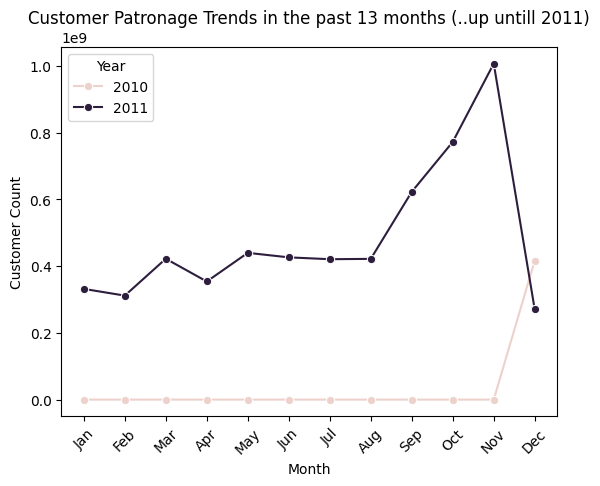

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only 2010 and 2011
filtered_df = online_retail_df[online_retail_df['year'].isin([2010, 2011])]

# Group by year and month, count unique customers
customer_trend = (
    filtered_df.groupby(['year', 'month_name'])['CustomerID']
    .sum()
    .reset_index(name='unique_customers')
)


# Ensure months are in chronological order
months_order = ["Jan","Feb","Mar","Apr","May","Jun",
                "Jul","Aug","Sep","Oct","Nov","Dec"]
customer_trend['month_name'] = pd.Categorical(
    customer_trend['month_name'], categories=months_order, ordered=True
)
# Plot line chart comparing 2010 vs 2011
g = sns.lineplot(
    data=customer_trend,
    x='month_name',
    y='unique_customers',
    hue='year',
    marker='o'
)

plt.xlabel("Month")
plt.ylabel("Customer Count")
plt.title("Customer Patronage Trends in the past 13 months (..up untill 2011)")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.show()




In [22]:
fig = g.get_figure()   # works if g is an AxesSubplot
fig.savefig("customer_trend2.png", dpi=300, bbox_inches="tight")


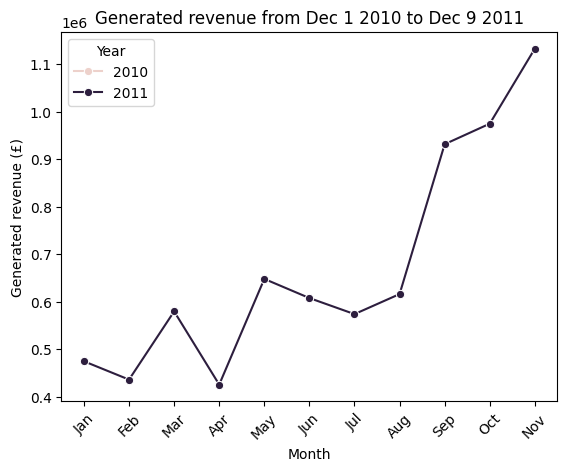

In [21]:
# Filter only 2010 and 2011
filtered_df = online_retail_df[online_retail_df['year'].isin([2010, 2011])]

# If Price is already revenue, keep it. Otherwise compute:
# filtered_df['Revenue'] = filtered_df['Quantity'] * filtered_df['UnitPrice']

# Group by year and month, sum revenue
generated_revenue = (
    filtered_df.groupby(['year', 'month_name'])['Price']
    .sum()
    .reset_index()
)

# Ensure months are in chronological order
months_order = ["Jan","Feb","Mar","Apr","May","Jun",
                "Jul","Aug","Sep","Oct","Nov"]
generated_revenue['month_name'] = pd.Categorical(
    generated_revenue['month_name'], categories=months_order, ordered=True
)

# Plot line chart comparing 2010 vs 2011
sns.lineplot(
    data=generated_revenue,
    x='month_name',
    y='Price',
    hue='year',
    marker='o'
)

plt.xlabel("Month")
plt.ylabel("Generated revenue (£)")
plt.title("Generated revenue from Dec 1 2010 to Dec 9 2011")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.show()


<h2> Factors driving increased revenue generation </h2>

Country, Month of order were all investigated as potential factors contributing to revenue generation

<h2> Making connection to mysql database </h2>

--- sqlalchemy and pymysql were used for database connection

In [16]:
from sqlalchemy import create_engine
import pymysql

DB_user = 'root'
DB_password = '123456'
DB_host = 'localhost'
DB_port = '3306'
DB_name = 'churn'

table = 'churn_table'


# connection
connection = f"mysql+pymysql://{DB_user}:{DB_password}\
@{DB_host}:{DB_port}/{DB_name}"

engine = create_engine(connection)


    


connection successful


<h2> Writing to mysql database </h2>

--- with custom function: df_to_mysql

In [17]:
# churned ingestion to mysql

try:
    with engine.connect() as conn:
        print ('connection successful')

        def df_to_mysql(df, df_name, table_name, mysql_connection, batch_size = 4000):
            try:
                df.to_sql(
                name = table_name,
                con = mysql_connection,
                if_exists = 'replace',
                method = 'multi',
                index = False,
                chunksize = batch_size
                )
                print (f'{df_name} written to {DB_name} DataBase successfully as {table_name}')
except Exception as e1:
    print (e1)

In [150]:
df_to_mysql(churned, "churned", table, connection)

churned written to churn DataBase successfully as churn_table


In [20]:
table2 = "table_info"


In [34]:
df_to_mysql(online_retail_df, "online_retail_df",table2,connection, batch_size = 10000) # writing online_retail_df to churn databse

online_retail_df written to churn DataBase successfully as table_info
